In [165]:
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [166]:
TRAIN_DATA_PATH = os.path.join("datasets")

In [167]:
# Loading the train and test datasets
def loading_data_train(train_data_path=TRAIN_DATA_PATH):
    csv_path = os.path.join(train_data_path, "train.csv")
    return pd.read_csv(csv_path)

In [168]:
train = loading_data_train()

In [169]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Analyzing the train data

In [170]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [171]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [172]:
# Dropping the PassengerId Column
train.drop(columns=["PassengerId"], inplace=True)

In [173]:
# Verifying if the column was dropped correctly
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


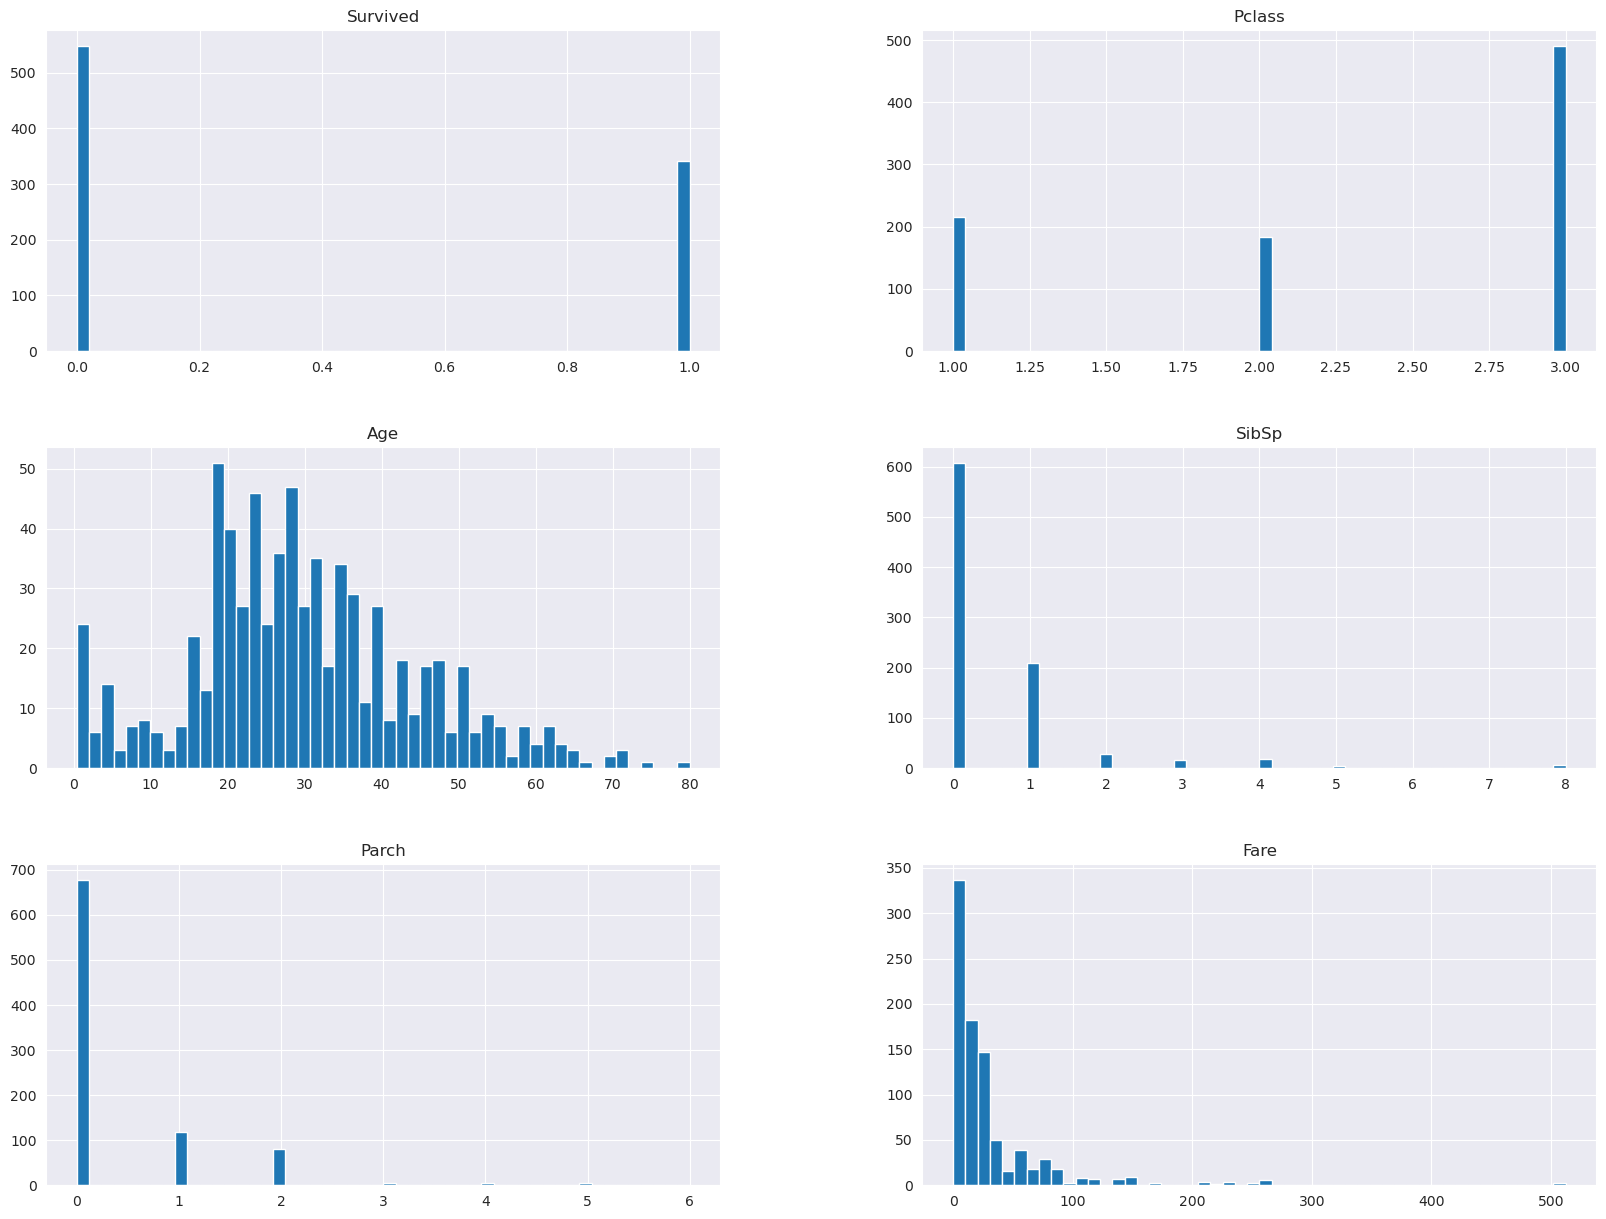

In [174]:
train.hist(bins=50, figsize=(20, 15))
plt.show()

In [175]:
# Verifying inconsistent values
def inconsistent_values(data):
    numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
    for column in numeric_columns:
        inconsistent_values = data.loc[data[column] < 0]
        if inconsistent_values.empty:
            print(f"Column {column} has no inconsistent values")
        else:
            print(f"Column {column} has inconsistent values")
    return data


In [176]:
# Verifying missing data
def missing_data(data):
    numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
    categorical_columns = data.select_dtypes(exclude=['int64', 'float64']).columns

    # Counting the number of missing data in each column
    for column in data.columns:
        count = data[column].isnull().sum()
        if count > 0:
            print(f"{column} has {count} missing data")
        else: print(f"{column} has no missing data")

    # Replacing the missing values in numerical columns with the mean
    data[numeric_columns] = data[numeric_columns].apply(lambda column: column.fillna(column.mean()))
    # Replacing the missing data in categorical columns as 'Unknown'
    data[categorical_columns] = data[categorical_columns].fillna("Unknown")

    return data


In [177]:
train = inconsistent_values(train)

Column Survived has no inconsistent values
Column Pclass has no inconsistent values
Column Age has no inconsistent values
Column SibSp has no inconsistent values
Column Parch has no inconsistent values
Column Fare has no inconsistent values


In [178]:
train = missing_data(train)

Survived has no missing data
Pclass has no missing data
Name has no missing data
Sex has no missing data
Age has 177 missing data
SibSp has no missing data
Parch has no missing data
Ticket has no missing data
Fare has no missing data
Cabin has 687 missing data
Embarked has 2 missing data


In [188]:
# Creating a function to plot a correlation matrix
def correlation_matrix_for_numeric_data(data):
    numeric_columns = data.select_dtypes(include=['int64', 'float64'])
    correlation_matrix = numeric_columns.corr()
    survived_correlation = correlation_matrix['Survived'].sort_values(ascending=False)

    return survived_correlation

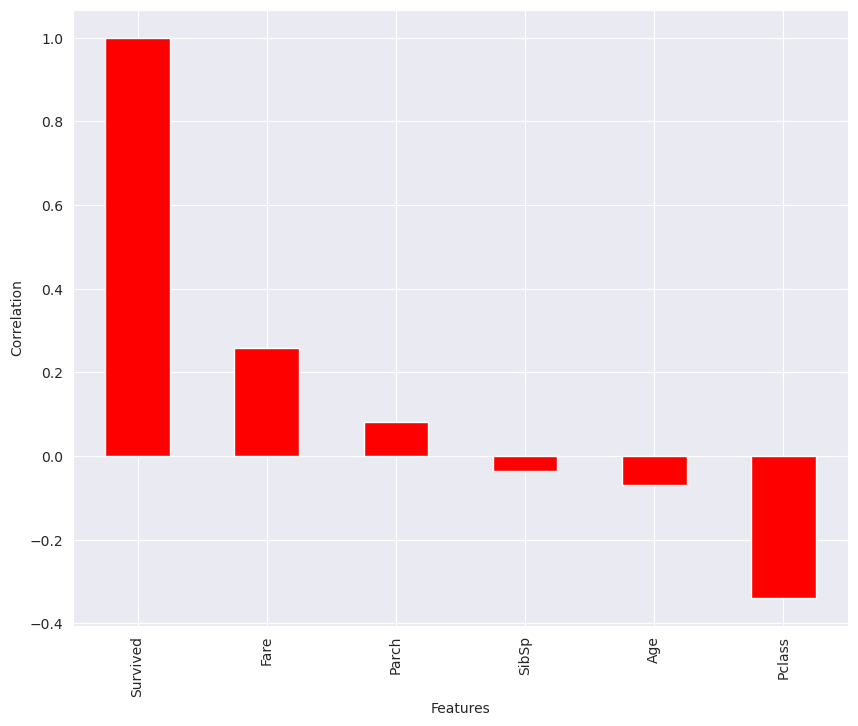

In [190]:
survived_correlation = correlation_matrix_for_numeric_data(train)
plt.figure(figsize = (10, 8))
survived_correlation.plot(kind='bar', color='red')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()